In [22]:
#Importing required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# importing the csv file
df = pd.read_csv(r'C:\Users\diana\Downloads\Cybersecurity EDA\cyberattacks.csv')

In [24]:
# Checked the data information

df.info()

data = pd.read_csv(r'C:\Users\diana\Downloads\Cybersecurity EDA\cyberattacks.csv')
# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

(None,
          Timestamp Source IP Address Destination IP Address  Source Port   
 0   5/30/2023 6:33     103.216.15.12           84.9.164.252        31225  \
 1   8/26/2020 7:08    78.199.217.198         66.191.137.154        17245   
 2  11/13/2022 8:23      63.79.210.48          198.219.82.17        16811   
 3   7/2/2023 10:38     163.42.196.10        101.228.192.255        20018   
 4  7/16/2023 13:11     71.166.185.76        189.243.174.238         6131   
 
    Destination Port Protocol  Packet Length Packet Type Traffic Type   
 0             17616     ICMP            503        Data         HTTP  \
 1             48166     ICMP           1174        Data         HTTP   
 2             53600      UDP            306     Control         HTTP   
 3             32534      UDP            385        Data         HTTP   
 4             26646      TCP           1462        Data          DNS   
 
                                         Payload Data  ... Action Taken   
 0  Qui natus 

In [25]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,5/30/2023 6:33,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,8/26/2020 7:08,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,11/13/2022 8:23,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,7/2/2023 10:38,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,7/16/2023 13:11,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [26]:
df.info() # Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [27]:
#Data Cleaning

df.isnull().sum()  # Missing Values

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [28]:
df.dropna(inplace=True)  # Handling Missing Values

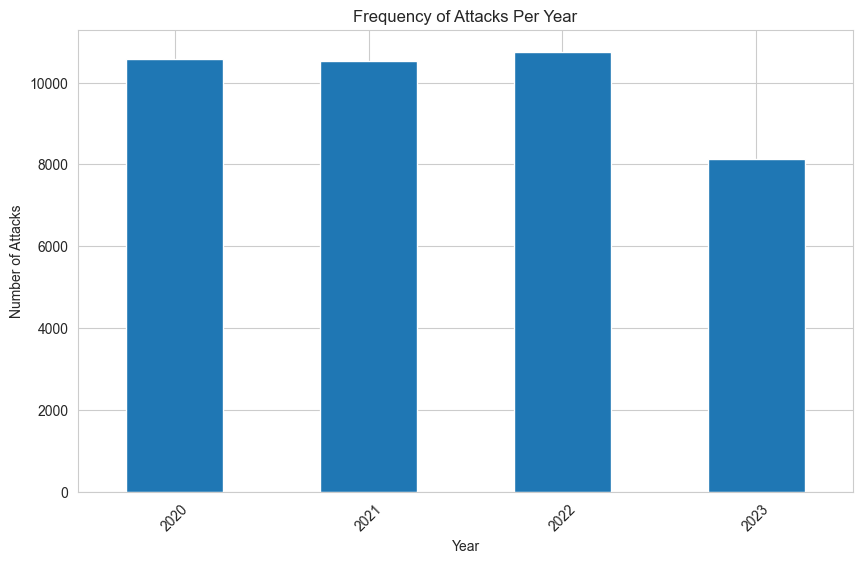

(        Source Port  Destination Port  Packet Length  Anomaly Scores
 count  40000.000000      40000.000000   40000.000000    40000.000000
 mean   32970.356450      33150.868650     781.452725       50.113473
 std    18560.425604      18574.668842     416.044192       28.853598
 min     1027.000000       1024.000000      64.000000        0.000000
 25%    16850.750000      17094.750000     420.000000       25.150000
 50%    32856.000000      33004.500000     782.000000       50.345000
 75%    48928.250000      49287.000000    1143.000000       75.030000
 max    65530.000000      65535.000000    1500.000000      100.000000,
 Protocol
 ICMP    13429
 UDP     13299
 TCP     13272
 Name: count, dtype: int64,
 Attack Type
 DDoS         13428
 Malware      13307
 Intrusion    13265
 Name: count, dtype: int64,
 Severity Level
 Medium    13435
 High      13382
 Low       13183
 Name: count, dtype: int64)

In [29]:
# Setting the aesthetics for plots
sns.set_style("whitegrid")

# 1. Descriptive Statistics for numerical columns
desc_stats = data.describe()

# 2. Frequency Counts for some categorical columns
protocol_counts = data['Protocol'].value_counts()
attack_type_counts = data['Attack Type'].value_counts()
severity_level_counts = data['Severity Level'].value_counts()

# 3. Temporal Analysis: Converting timestamp to datetime and extracting year for trend analysis
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year'] = data['Timestamp'].dt.year
attacks_per_year = data['Year'].value_counts().sort_index()

# Plotting the frequency of attacks per year
plt.figure(figsize=(10, 6))
attacks_per_year.plot(kind='bar')
plt.title('Frequency of Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

desc_stats, protocol_counts.head(), attack_type_counts.head(), severity_level_counts.head()

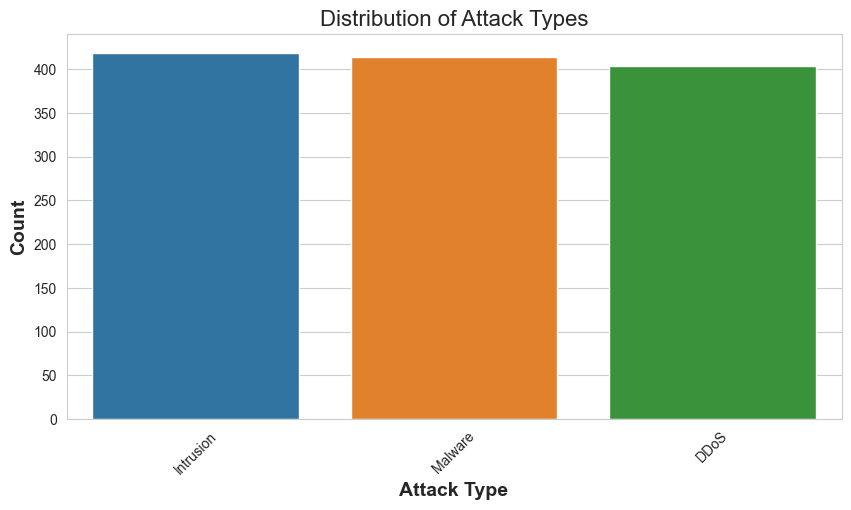

Attack Type
Intrusion    419
Malware      414
DDoS         404
Name: count, dtype: int64


In [30]:
# Visualize the distribution of attack types

attack_counts = df['Attack Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=attack_counts.index , y=attack_counts)

plt.xlabel('Attack Type',fontsize=14, fontweight='bold')
plt.ylabel('Count',fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

plt.xticks(rotation=45)
plt.show()

print(attack_counts)

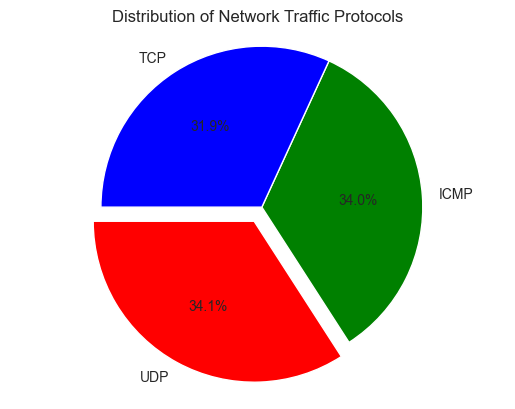

In [31]:
# Data for the pie chart


labels = ['UDP', 'ICMP', 'TCP']
sizes = df['Protocol'].value_counts()  # Proportional sizes of each category
colors = ['red', 'green', 'blue']  # Color for each category segment
explode = (0.1, 0, 0)  # Explode a slice if needed (0 means no explosion)


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=180)


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Network Traffic Protocols')


# Display the pie chart
plt.show()

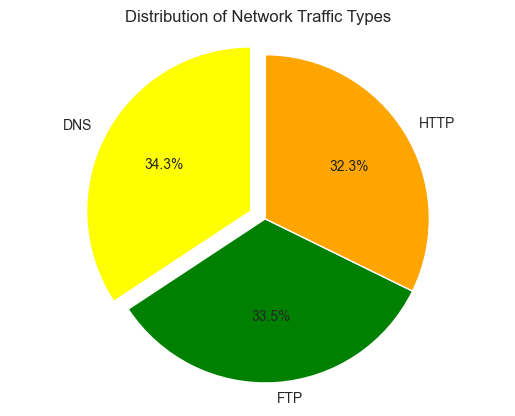

In [32]:
# Data for the pie chart

labels =['DNS','FTP','HTTP']
sizes = df['Traffic Type'].value_counts()
colors = ['yellow', 'green', 'orange']
explode = (0.1, 0, 0) 

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  
plt.title('Distribution of Network Traffic Types')

# Display the pie chart
plt.show()

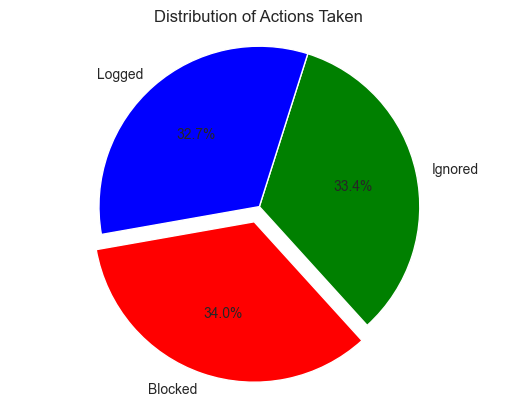

In [33]:
labels =['Blocked','Ignored','Logged']
sizes =df['Action Taken'].value_counts()
colors = ['Red', 'green', 'blue']
explode = (0.1, 0, 0) 


# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=190)

plt.axis('equal')
plt.title('Distribution of Actions Taken')

# Display the pie chart
plt.show()

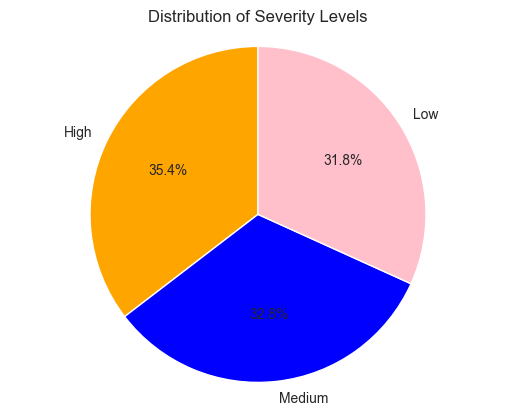

In [34]:
# Data for the pie chart
labels =['High','Medium','Low']
sizes =df['Severity Level'].value_counts()
colors = ['orange', 'blue','pink'] 
explode = (0, 0,0)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal') 
plt.title('Distribution of Severity Levels')

# Display the pie chart
plt.show()

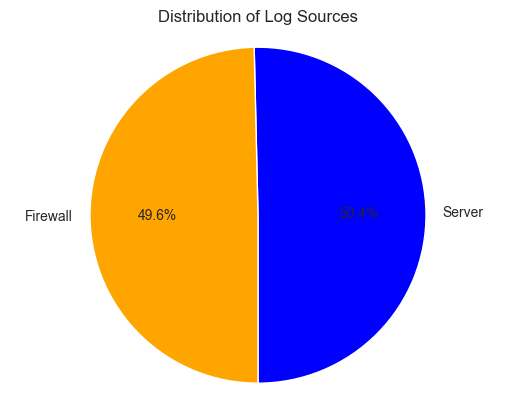

In [35]:
labels =['Server','Firewall']
sizes =df['Log Source'].value_counts()  
colors = ['blue', 'orange']
explode = (0, 0) 

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=270)

plt.axis('equal')
plt.title('Distribution of Log Sources')

# Display the pie chart
plt.show()

NameError: name 'warnings' is not defined

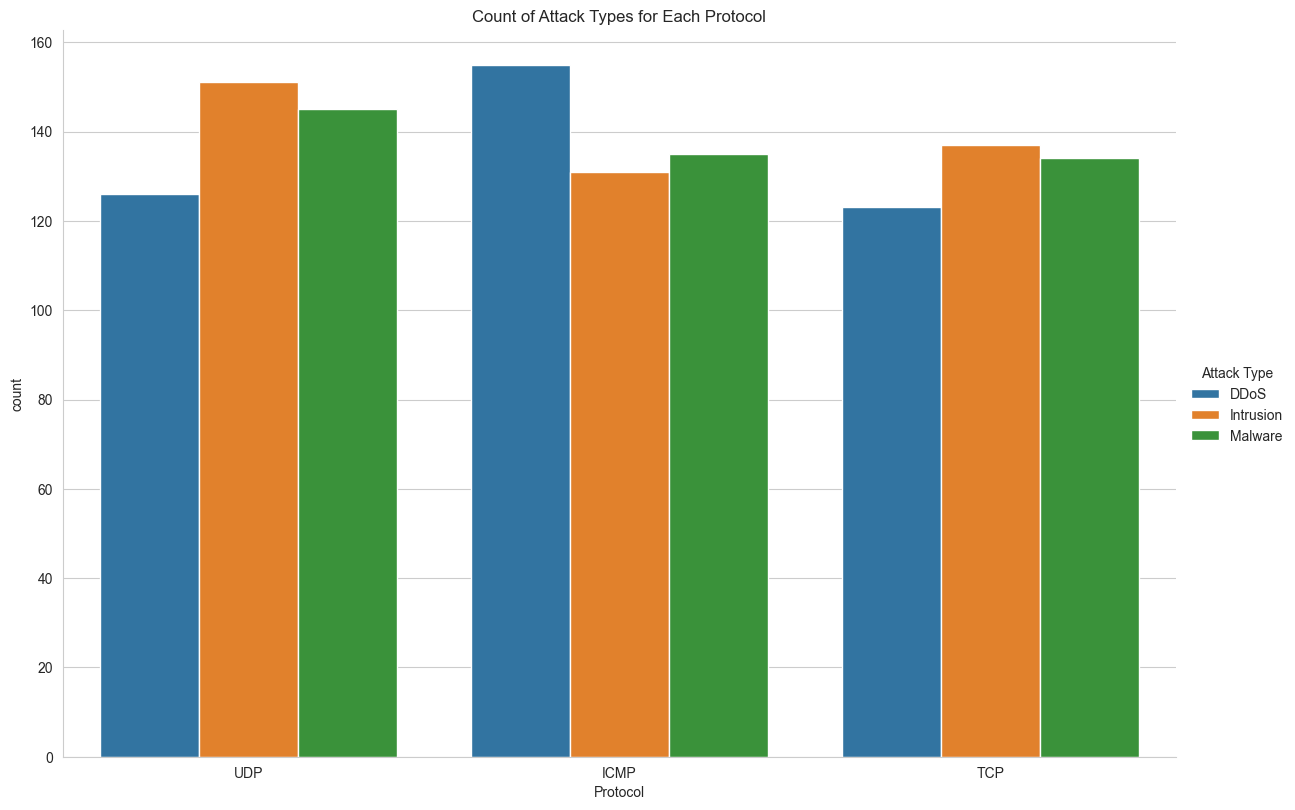

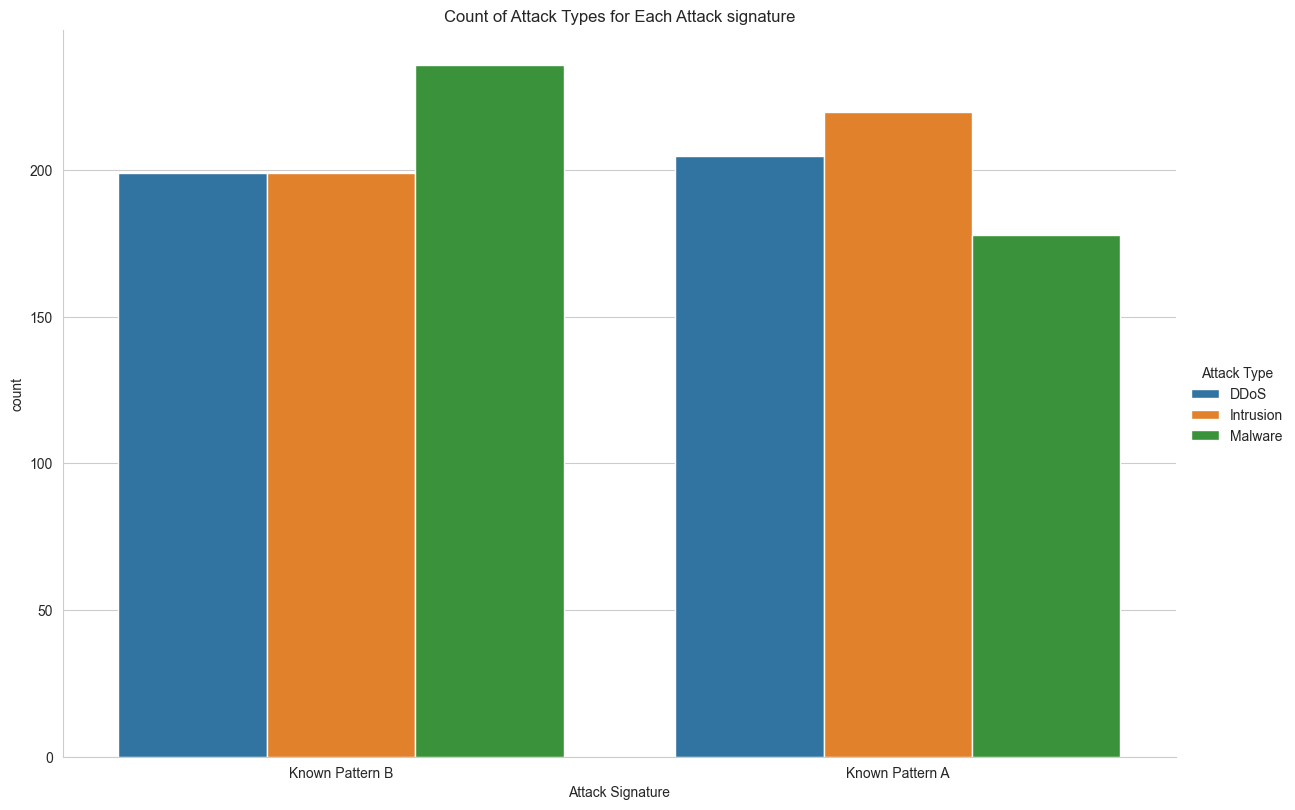

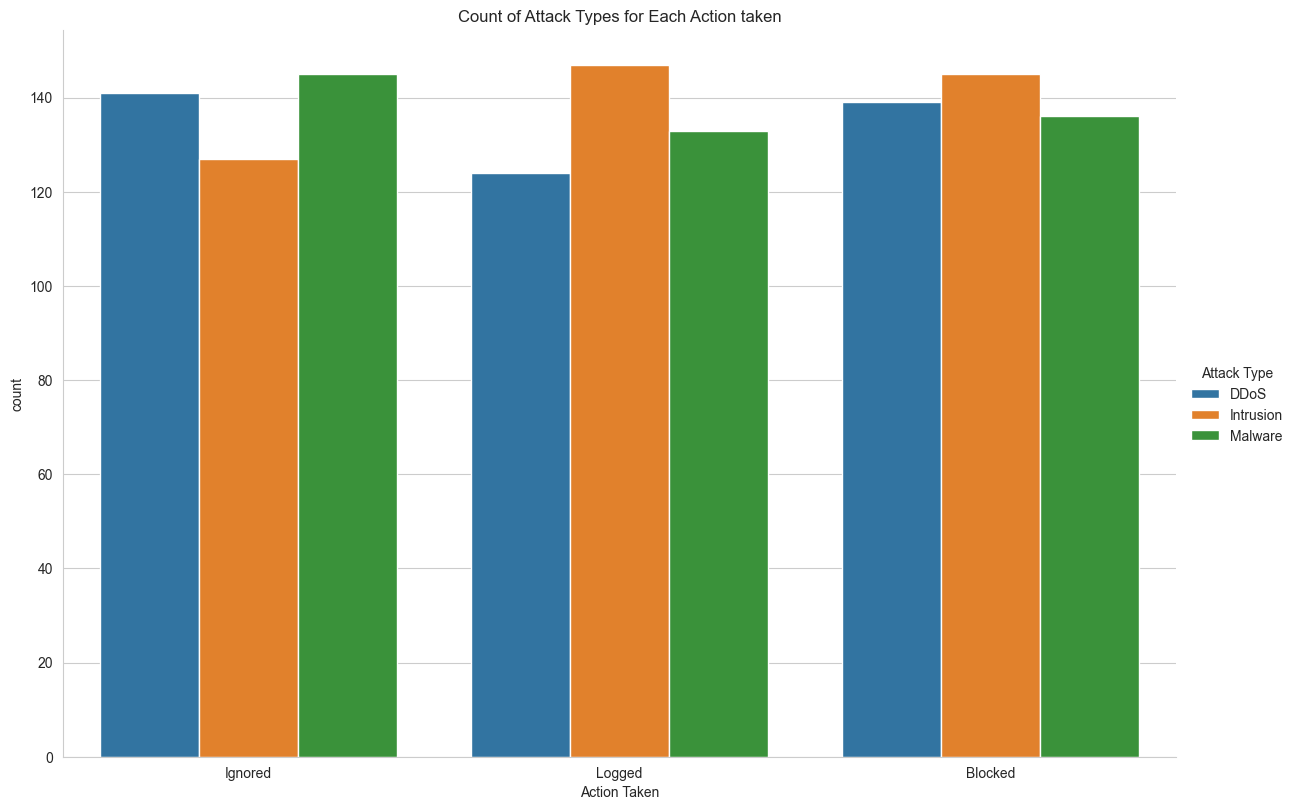

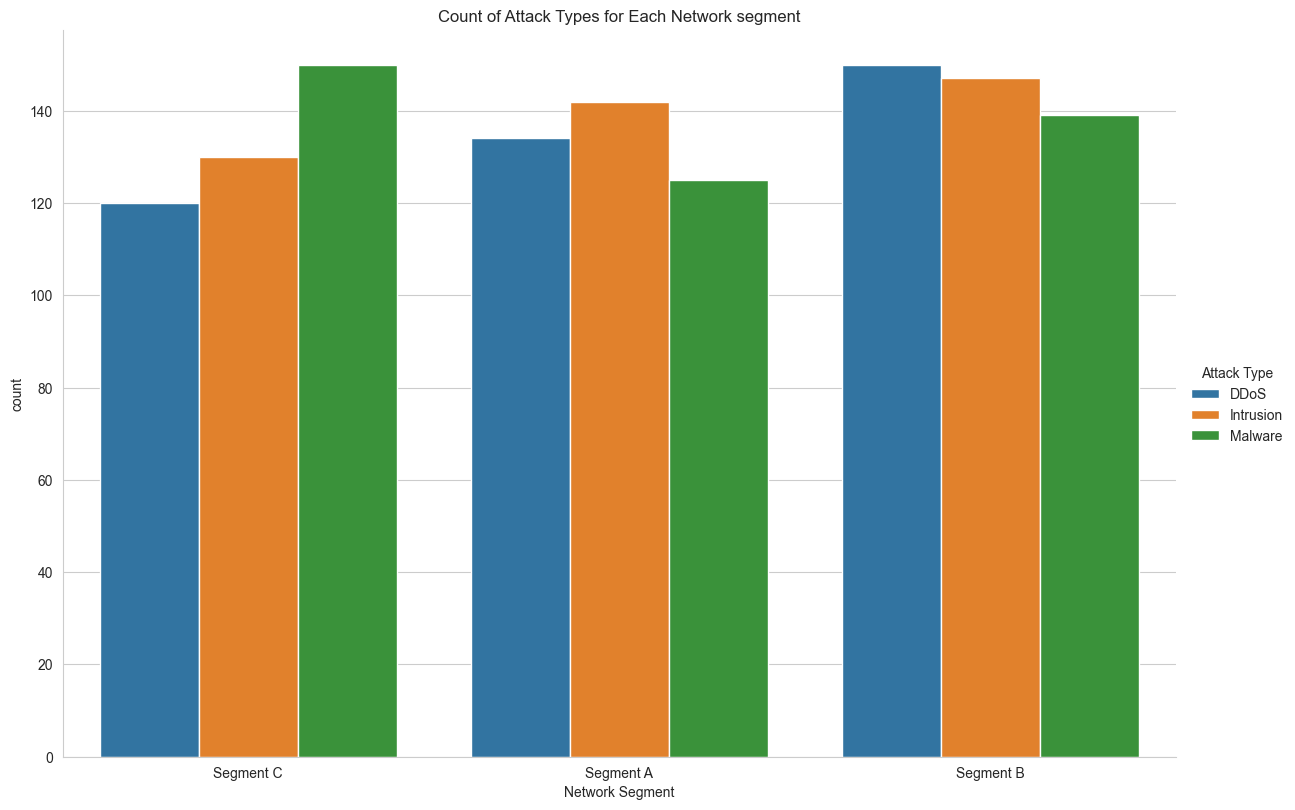

In [36]:
#list of columns 
columns_to_plot = ['Protocol','Attack Signature','Action Taken','Network Segment']

#plot a bar chart for each column
for col in columns_to_plot:
    sns.catplot(data=df, x=col, hue='Attack Type', kind='count', height=8, aspect=1.5)
    plt.title(f'Count of Attack Types for Each {col.capitalize()}')
    plt.show


# Reset the warning filter to default
warnings.filterwarnings("default")

In [ ]:
#columns to plot
columns = ['Anomaly Scores','Source Port','Packet Length']

#plotting box plot for each columns
for col in columns:
    sns.boxplot(data=df, x=col, hue='Attack Type')
    plt.title(f'Count of Attack Types for Each {col.capitalize()}')
    plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = data[['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

correlation_matrix
